

---


**$$\color{orange}{AML\ 5251\,\lvert\, Advanced\ Applications\ of\ Probability\ and\ Statistics\,\lvert\,Lab\ Final\,\lvert\,Even\ Semester\ 2024}$$**

---

**Instructions:**
1. There are 15 questions;
2. The exam is open book, notes, internet etc. You are welcome to refer to any non-human resource such as ChatGPT, Gemini, Grok, Bard etc., for answering the questions;
3. However, you must *not* discuss your questions or code with anyone else, inside or outside the class;
4. You should not share the code with anyone else; doing so will result in significant penalties for all involved.
5. By submitting your work, you are implicitly honoring the agreement above;
6. You might be called for a one-on-one during the exam after reviewing your submission to explain your code and answer additional questions. Failure to justify your code and answers will result in significant points docked from your exam score.
7. After finishing the exam, delete all codes related to the exam from the computer you are working on.

---

**Upload a PDF of your completed code clearly showing the output cells (go to file->print->save as PDF choosing Landscape orientation) with the naming convention example $$\color{cyan}{\text{AAPS_LabFinal_SudarsanAcharya.pdf}}$$ by clicking [here](https://learnermanipal-my.sharepoint.com/:f:/g/personal/sudarsan_acharya_manipal_edu/Eo54iA1tO1pJhszqWNJtqOQBQaK4E2yXjIBrhB1sP6kKuA)**


---

In [1]:
# Install and load packages
library(ggplot2)
library(dplyr)
install.packages('HSAUR')
library(HSAUR)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tools



In [2]:
# Load the heptathlon dataset
data(heptathlon)
str(heptathlon)

'data.frame':	25 obs. of  8 variables:
 $ hurdles : num  12.7 12.8 13.2 13.6 13.5 ...
 $ highjump: num  1.86 1.8 1.83 1.8 1.74 1.83 1.8 1.8 1.83 1.77 ...
 $ shot    : num  15.8 16.2 14.2 15.2 14.8 ...
 $ run200m : num  22.6 23.6 23.1 23.9 23.9 ...
 $ longjump: num  7.27 6.71 6.68 6.25 6.32 6.33 6.37 6.47 6.11 6.28 ...
 $ javelin : num  45.7 42.6 44.5 42.8 47.5 ...
 $ run800m : num  129 126 124 132 128 ...
 $ score   : int  7291 6897 6858 6540 6540 6411 6351 6297 6252 6252 ...


In [3]:
# Introduce a new column called sprint highlighting slow and fast sprinters
heptathlon = heptathlon %>% mutate(sprint = ifelse(run200m <= 25 & run800m <= 129, 'fast', 'slow'))

# Change sprint column to factor type
heptathlon['sprint'] = lapply(heptathlon['sprint'], factor)

In [4]:
# Print the first few rows of the dataframe
head(heptathlon)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score,sprint
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291,fast
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897,fast
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858,fast
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540,slow
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540,fast
Schulz (GDR),13.75,1.83,13.50,24.65,6.33,42.82,125.79,6411,fast


**Question-1**: Make a scatter plot between *run200m* (x-axis) and *longjump* (y-axis). What do you observe from this plot?

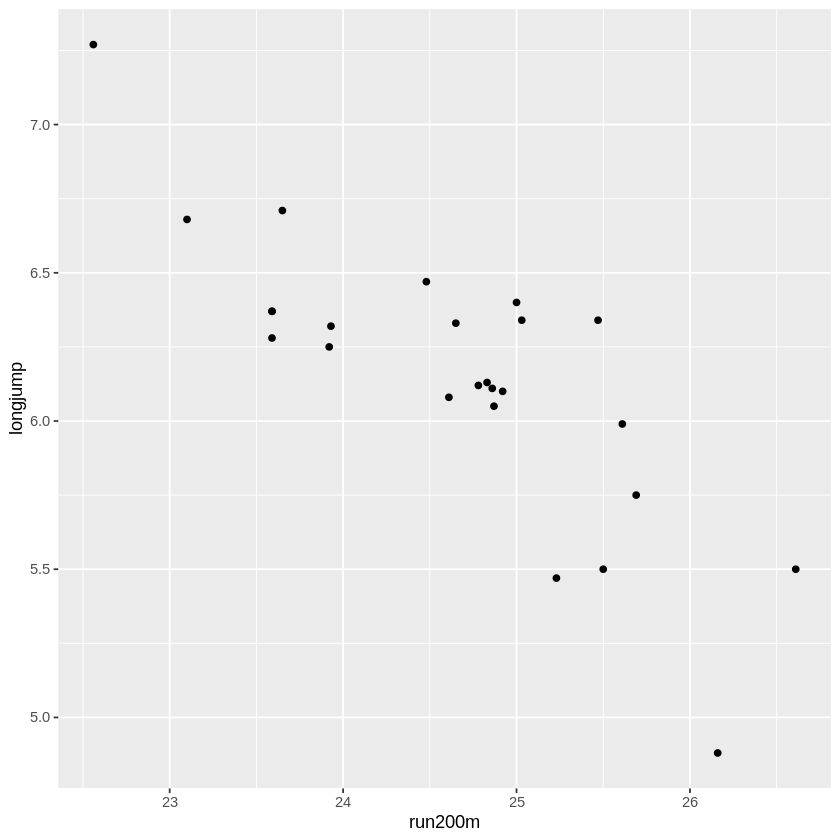

In [6]:
p1 = ggplot(data = heptathlon, aes(x = run200m, y = longjump)) +
  geom_point()
p1

By looking at the above plot we could say that run200m and longjump are negatively covariated. That is as someone who is a slow runner, who takes more than 25seconds to complete the 200m race can only jump around 5meters long.

In [8]:
cov(heptathlon$run200m,heptathlon$longjump)

[1] -0.3757313

**Question-2**: Make a scatter plot between *run200m* (x-axis) and *longjump* (y-axis) with the data points color-coded using *sprint*. What do you observe from this plot?

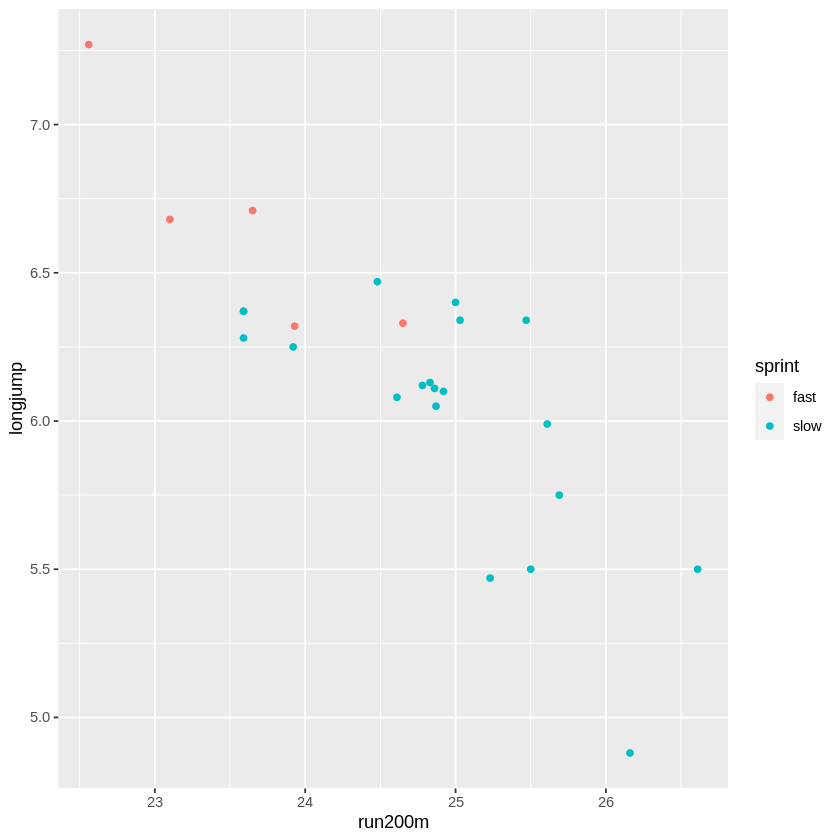

In [9]:
p2 = p2 = ggplot(data = heptathlon, aes(x = run200m, y = longjump, color = sprint)) +
  geom_point()
p2

By looking at the above plot we can tell that is most of the fast runners can jump long around 6.5 to 7meters.

**Question-3**: Calculate Pearson's correlation between *run200m* and *longjump*. What do you observe?

In [10]:
cor(heptathlon$run200m, heptathlon$longjump, method = 'pearson')

[1] -0.8172053

**Question-4**: Select data frame without *sprint* and *score* columns.

In [15]:
hData = heptathlon %>% select(-c(sprint,score))

**Question 5**: Using the code in the cell below, answer the following questions:

1. Which principal component assigns the greatest weight (in magnitude) to *run200m*?
2. Which principal component assigns the greatest weight (in magnitude) to *longjump*?
3. *True/false*: the 2nd principal component score for a sample assigns a maximum weight to *javelin*.
4. The 1st principal component assigns the least weight (in magnitude) to which feature?

Does using the correlation matrix change your answers to the above questions? Which one will you finally use for dimension reduction using PCA: the covariance or the correlation matrix?

In [16]:
# Calculate eigenvalues & eigenvectors of sample covariance matrix
e = eigen(cov(hData))

# Eigenvectors of the sample covariance matrix
u =e$vectors

# Eigenvalues of the sample covariance matrix
lambda = e$values

In [40]:
# Calculate eigenvalues & eigenvectors of sample covariance matrix
e = eigen(cor(hData))

# Eigenvectors of the sample covariance matrix
u =e$vectors

# Eigenvalues of the sample covariance matrix
lambda = e$values

In [41]:
u

0.4528710,-0.15792058,0.04514996,-0.02653873,-0.09494792,0.78334101,0.38024707
-0.3771992,0.24807386,-0.36777902,0.67999172,-0.01879888,0.09939981,0.43393114
-0.3630725,-0.28940743,0.67618919,0.12431725,-0.51165201,-0.05085983,0.21762491
0.4078950,0.26038545,-0.08359211,0.36106580,-0.64983404,-0.02495639,-0.45338483
-0.4562318,0.05587394,0.13931653,0.11129249,0.18429810,0.59020972,-0.61206388
-0.0754090,-0.84169212,-0.47156016,0.12079924,-0.13510669,-0.02724076,-0.17294667
0.3749594,-0.22448984,0.39585671,0.60341130,0.50432116,-0.15555520,-0.09830963


In [38]:
colnames(hData)

[1] "hurdles"  "highjump" "shot"     "run200m"  "longjump" "javelin"  "run800m"

In [18]:
#Printing the eigen vectors
print(u)

             [,1]          [,2]        [,3]        [,4]        [,5]
[1,]  0.069508692  0.0094891417  0.22180829  0.32737674  0.80702932
[2,] -0.005569781 -0.0005647147 -0.01451405 -0.02123856 -0.14013823
[3,] -0.077906090 -0.1359282330 -0.88374045  0.42500654  0.10442207
[4,]  0.072967545  0.1012004268  0.31005700  0.81585220 -0.46178680
[5,] -0.040369299 -0.0148845034 -0.18494319 -0.20419828 -0.31899315
[6,]  0.006685584 -0.9852954510  0.16021268  0.03216907 -0.04880388
[7,]  0.990994208 -0.0127652701 -0.11655815 -0.05827720 -0.02784756
             [,6]         [,7]
[1,]  0.424850883  0.083123145
[2,]  0.098373568  0.984881131
[3,] -0.051744802  0.015649644
[4,]  0.082486244 -0.051312974
[5,]  0.894592570 -0.142110352
[6,]  0.006170438 -0.005033005
[7,] -0.002987043 -0.001041451


In [19]:
#Printing the eigen values
lambda

[1] 69.967253281 12.895102688  1.920157728  0.343059843  0.104857334
[6]  0.021644924  0.001105536



1.   Principal Component 4 assigns the greatest weight (in magnitude) to run200m
2.   Principal Component 6 assigns the greatest weight (in magnitude) to longjump
3.   True, the 2nd principal component score for a sample assigns a maximum weight to javelin
4.   1st principal component assigns the least weight (in magnitude) to HighJump






**Question-6**: Explain the output of the cell below?

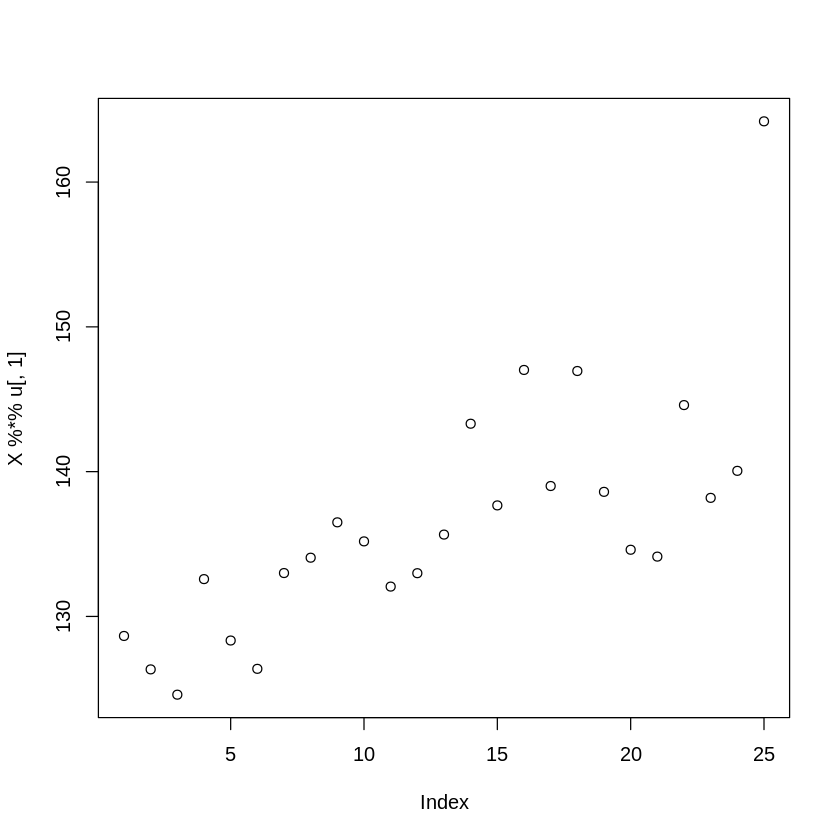

In [37]:
plot(X %*% u[, 1])

In [20]:
# Extract data matrix from data frame
X = as.matrix(hData)

print(X %*% u[, 1])

                        [,1]
Joyner-Kersee (USA) 128.6514
John (GDR)          126.3423
Behmer (GDR)        124.5962
Sablovskaite (URS)  132.5776
Choubenkova (URS)   128.3359
Schulz (GDR)        126.3804
Fleming (AUS)       132.9964
Greiner (USA)       134.0565
Lajbnerova (CZE)    136.4989
Bouraga (URS)       135.1834
Wijnsma (HOL)       132.0612
Dimitrova (BUL)     132.9867
Scheider (SWI)      135.6531
Braun (FRG)         143.3104
Ruotsalainen (FIN)  137.6684
Yuping (CHN)        147.0239
Hagger (GB)         139.0075
Brown (USA)         146.9512
Mulliner (GB)       138.6044
Hautenauve (BEL)    134.6055
Kytola (FIN)        134.1319
Geremias (BRA)      144.5973
Hui-Ing (TAI)       138.1891
Jeong-Mi (KOR)      140.0555
Launa (PNG)         164.1953


PC1 score for each row/record in the dataset

**Question-7**: Explain the output of the cell below?

In [21]:
print(var(X %*% u[, 2]))

        [,1]
[1,] 12.8951


Variance of 2nd Principal Component. It is the variance explained by PC2

**Question-8**: How many minimum principal components are needed to explain more than 90% of the variance in the data? In one line, explain how you could use the corresponding principal component scores (projected values) to get a final score for each athlete so that they can be ranked.

In [30]:
cumulative_variance = cumsum(lambda) / sum(lambda)
num_components = which.max(cumulative_variance > 0.9)
print(num_components)


[1] 2


We have to multiply the principal component values by their corresponding loadings and sum them up. This gives us a single composite score for each athlete, which can then be used for ranking.

**Question 9**: how many levels does the categorical variable *sprint* have? What is the reference level?

In [22]:
levels(heptathlon$sprint)

[1] "fast" "slow"

**Question 10**: fit a linear model for approximating *score* as a function of *shot* and *sprint*. Print the model's summary. How accurate is the model?

In [24]:
model = lm(data = heptathlon, score ~ shot+sprint)
summary(model)


Call:
lm(formula = score ~ shot + sprint, data = heptathlon)

Residuals:
     Min       1Q   Median       3Q      Max 
-1124.58  -164.40    35.93   207.34   496.35 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3080.0      883.0   3.488 0.002084 ** 
shot           249.7       58.4   4.275 0.000308 ***
sprintslow    -330.4      213.4  -1.548 0.135842    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 338.5 on 22 degrees of freedom
Multiple R-squared:  0.6749,	Adjusted R-squared:  0.6454 
F-statistic: 22.84 on 2 and 22 DF,  p-value: 4.282e-06


**Question 11**: fit a linear model for approximating *score* as a function of *shot*, *javelin*, and *sprint*. Print the model's summary and answer the following questions:

1. Did the addition of the new predictor *javelin* improve the model accuracy?
2. *True/false* (explain in one line): the model suggests that there is a possible linear relationship between an athlete's score and javelin performance.
3. For a 1 metre increase in shot put throw and with the same javelin and sprint performance, we can say with 95% confidence that the athlete's score will increase/decrease by an amount in the interval [?, ?].

In [27]:
model = lm(data = heptathlon, score ~ shot+sprint+javelin)
summary(model)


Call:
lm(formula = score ~ shot + sprint + javelin, data = heptathlon)

Residuals:
     Min       1Q   Median       3Q      Max 
-1090.63  -173.25    12.63   203.29   537.00 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3349.127   1347.536   2.485  0.02144 *  
shot         249.548     59.669   4.182  0.00042 ***
sprintslow  -354.060    235.151  -1.506  0.14705    
javelin       -5.996     22.297  -0.269  0.79061    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 345.9 on 21 degrees of freedom
Multiple R-squared:  0.676,	Adjusted R-squared:  0.6298 
F-statistic: 14.61 on 3 and 21 DF,  p-value: 2.301e-05


1. No, the addition of the new predictor javelin improve the model accuracy. The adjusted R-Squared value got reduced from 0.64 to 0.629
2. False. We can see the p-value for jevelin is 0.79, so with 10% as cutoff, this p-value is more. So we failed to reject the null hypothesis. That means there is no linear relation between the score and the javeline performance according to the given dataset. It is an insignificant feature.
3. [249-2X59,249+2X59]

**Question 12**: fit a linear model for approximating *score* as a function of *highjump*, and *sprint*. Print the model's summary and answer the following questions:
1. How accurate is this model?
2. Considering a p-value of 10% as cutoff, are there any insignificant features?

In [28]:
model = lm(data = heptathlon, score ~ highjump+sprint)
summary(model)


Call:
lm(formula = score ~ highjump + sprint, data = heptathlon)

Residuals:
    Min      1Q  Median      3Q     Max 
-476.12 -162.88  -29.12  146.92  502.33 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2030.8     1175.5  -1.728   0.0981 .  
highjump      4873.2      646.0   7.544 1.54e-07 ***
sprintslow    -703.3      123.3  -5.702 9.81e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 241.9 on 22 degrees of freedom
Multiple R-squared:  0.8341,	Adjusted R-squared:  0.819 
F-statistic: 55.29 on 2 and 22 DF,  p-value: 2.625e-09


1. Adjusted R-squared:  0.819 =82%
2. Considering a p-value of 10% as cutoff, no insignificant featues. As all features p-values are more than 0.1

**Question 13**: Using the model built above, extract the slope and intercept for estimating the *score* of *slow* and *fast* athletes. It would be helpful to start with the regression equation $\hat{y}^{(i)} = \hat{\beta}_0 + \hat{\beta}_1x_1^{(i)} + \hat{\beta}_2x_2^{(i)},$ and then write two separate equations for *slow* and *fast* athletes.

In [ ]:
intercept_slow =-2030.8-703.3
intercept_fast =-2030.8

slope_slow =4873.2 * highjump
slope_fast =4873.2 * highjump

**Question 14**: fit a linear model for approximating *score* as a function of *shot*, *highjump*, and *sprint*. Print the model's summary and answer the following questions:
1. How accurate is this model?
2. Considering a p-value of 10% as cutoff, are there any insignificant features?

In [29]:
model = lm(data = heptathlon, score ~ shot+highjump+sprint)
summary(model)


Call:
lm(formula = score ~ shot + highjump + sprint, data = heptathlon)

Residuals:
    Min      1Q  Median      3Q     Max 
-386.03 -103.72  -37.17  126.92  363.95 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2508.72     898.90  -2.791  0.01095 *  
shot          144.30      34.74   4.153  0.00045 ***
highjump     3950.55     537.93   7.344 3.16e-07 ***
sprintslow   -416.72     116.22  -3.586  0.00174 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 183.4 on 21 degrees of freedom
Multiple R-squared:  0.9089,	Adjusted R-squared:  0.8959 
F-statistic: 69.84 on 3 and 21 DF,  p-value: 4.306e-11


1. Adjusted R-squared:  0.8959 =89.6%
2. Considering a p-value of 10% as cutoff, no insignificant featues. As all features p-values are more than 0.1


**Question 15**: Complete the code below to build a linear model for approximating *score* as a function of *shot*, *highjump*, and *sprint* using the training data. Predict the model performance by applying it to the test data.

In [35]:
# Split the data into 80% train and 20% test parts
set.seed(0)
train_ind = sample(seq_len(nrow(hData)), size = floor(0.8 * nrow(hData)))
hDataTrain = heptathlon[train_ind, ]
hDataTest = heptathlon[-train_ind, ]
# Build linear regression model
model = lm(data = hDataTrain, score ~ shot + highjump + sprint)
# Predict on the test data
predicted_scores = predict(model, newdata = hDataTest)
# Print the true scores for the test data
true_scores = hDataTest$score
print(true_scores)
print(predicted_scores)

[1] 6858 6297 6137 5686 5289
  Behmer (GDR)  Greiner (USA) Scheider (SWI)   Kytola (FIN) Jeong-Mi (KOR) 
      6753.120       6215.849       6101.006       5761.886       5415.185 


In [36]:
#RMSE
mse = mean((true_scores - predicted_scores)^2)
rmse = sqrt(mse)
rmse

[1] 90.06889